# Testando o yfinance do yahoo

In [3]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# Salvando nomes para consulta
ggbr4 = yf.Ticker('GGBR4.SA')
ggbr3 = yf.Ticker('GGBR3.SA')
vale3 = yf.Ticker('VALE3.SA')
usim5 = yf.Ticker('USIM5.SA')
csna3 = yf.Ticker('CSNA3.SA')


In [6]:
# Obtendo histórico da ação nos últimos 10 anos
hggbr4 = ggbr4.history(period="10y")
hggbr3 = ggbr3.history(period="10y")
hvale3 = vale3.history(period="10y")
husim5 = usim5.history(period="10y")
hcsna5 = csna3.history(period="10y")
consulta = [hggbr4, hggbr3, hvale3, husim5, hcsna5]


Text(0.5, 1.0, 'Evolução do valor das ações nos últimos 10a.')

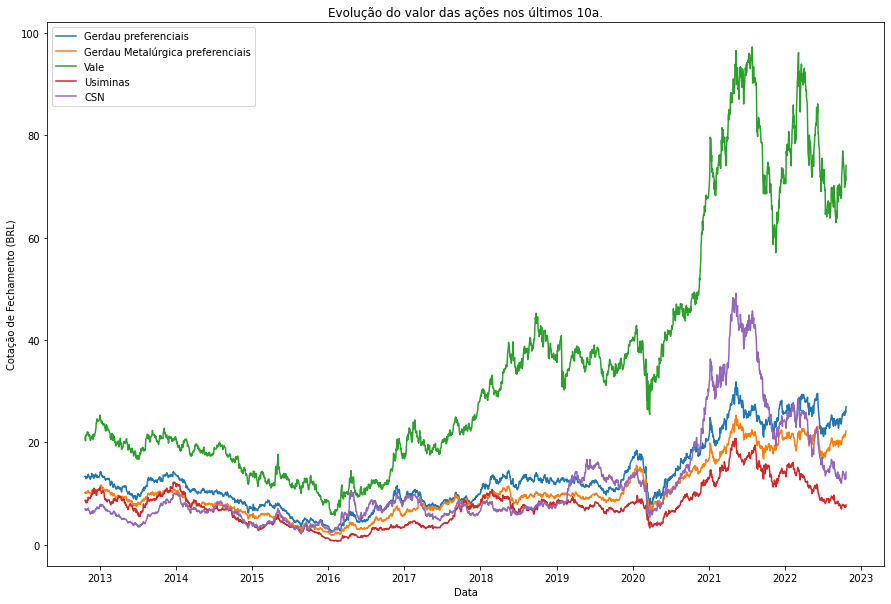

In [16]:
# Plotando gráfico
plt.figure(figsize=(15,10))
for hist in consulta:
    plt.plot(hist['Close'])
plt.legend(['Gerdau preferenciais', 'Gerdau Metalúrgica preferenciais', 'Vale', 'Usiminas', 'CSN',])
plt.ylabel('Cotação de Fechamento ({0})'.format(vale3.info['currency']))
plt.xlabel('Data')
plt.title('Evolução do valor das ações nos últimos 10a.')
